In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

symbols = ['AAPL','AMZN','DIA','FB','MSFT','NFLX','SPY','TSLA','TWTR','XOM']

plt.figure(figsize=(20,15))
for s in symbols[0:]:
    portfolio_df = pd.read_csv('Results Data/'+s+'_results.csv').iloc[:,[0,1]]
    portfolio_df['Date'] = pd.to_datetime(portfolio_df.Date)
    plt.plot(portfolio_df.Date,portfolio_df.iloc[:,1],label=s)

plt.hlines(y=1000,xmin=datetime(1970,1,1), xmax = datetime.today(), colors = 'black', linestyles='dashed', linewidth = 5)
plt.legend(loc='best')
plt.yscale('log')
plt.show()

C:\Users\Joe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 2000x1500 with 1 Axes>

In [16]:
portfolio_df = pd.DataFrame(columns=['Date'])
num_days = (datetime.today() - datetime(1970,1,1)).days
date_list = [base - timedelta(days=x) for x in range(num_days)]
portfolio_df['Date'] = date_list
portfolio_df['Date']= portfolio_df['Date'].dt.date
portfolio_df['Date'] = pd.to_datetime(portfolio_df.Date)

for s in symbols:
    sym_df = pd.read_csv('Results Data/'+s+'_results.csv').iloc[:,[0,1]]
    sym_df['Date'] = pd.to_datetime(sym_df.Date)
    portfolio_df = portfolio_df.merge(sym_df,how='left',on='Date')
    portfolio_df.rename(columns={'portfolio':s+'_portfolio'},inplace=True)

portfolio_df.fillna(0,inplace=True)
portfolio_df['Total'] = portfolio_df.iloc[:,1:].sum(axis=1)
portfolio_df[portfolio_df.Total!=0]

,Date,AAPL_portfolio,AMZN_portfolio,DIA_portfolio,FB_portfolio,MSFT_portfolio,NFLX_portfolio,SPY_portfolio,TSLA_portfolio,TWTR_portfolio,XOM_portfolio,Total
12,2020-08-21,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
13,2020-08-20,0.0,0.000000,1329.187081,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1329.187081
16,2020-08-17,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
19,2020-08-14,0.0,0.000000,1324.423993,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1324.423993
20,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,413.1194,0.0,0.0,0.000000,0.0,413.119400
...,...,...,...,...,...,...,...,...,...,...,...,...
18261,1970-09-04,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18265,1970-08-31,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18271,1970-08-25,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18277,1970-08-19,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000


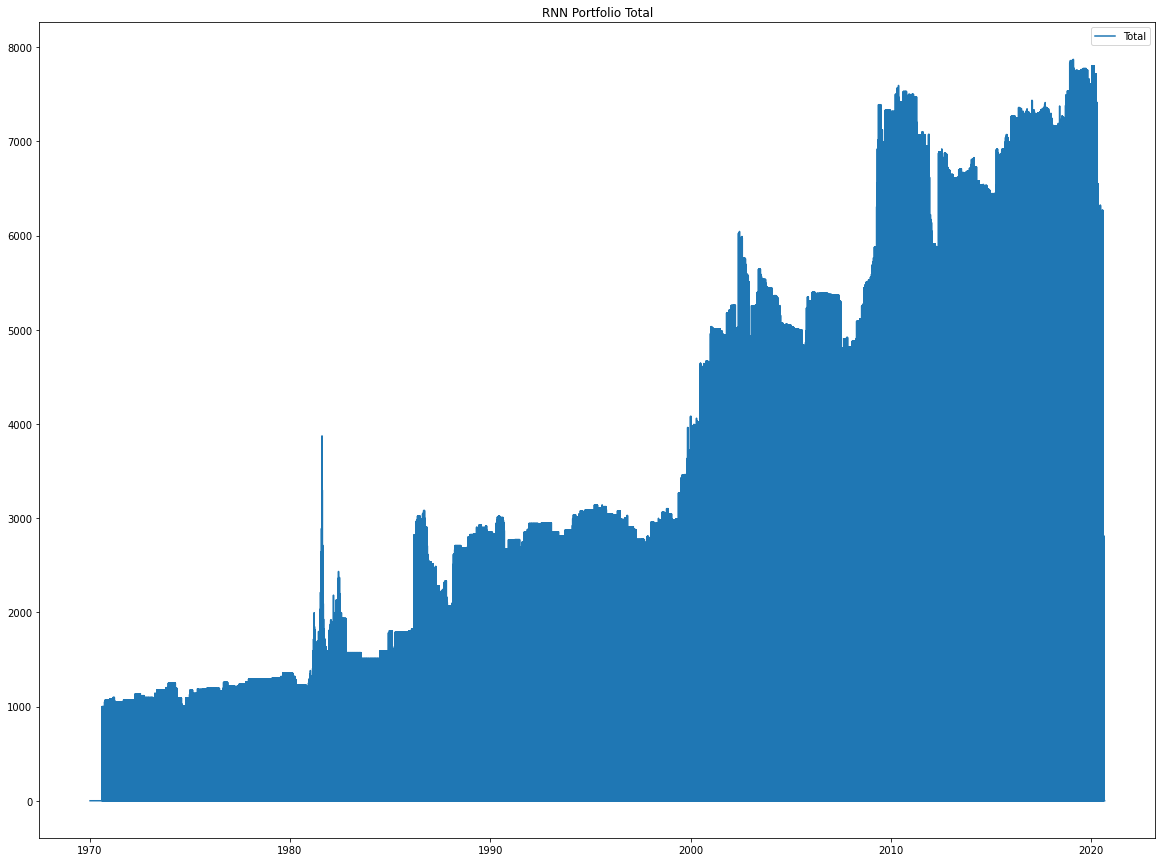

In [3]:
plt.figure(figsize=[20,15])
plt.plot(portfolio_df.Date,portfolio_df.Total,label='Total')
plt.legend(loc='best')
plt.title('RNN Portfolio Total')
plt.show()

In [4]:
portfolio_df[portfolio_df.Total!=0]

,Date,AAPL_portfolio,AMZN_portfolio,DIA_portfolio,FB_portfolio,MSFT_portfolio,NFLX_portfolio,SPY_portfolio,TSLA_portfolio,TWTR_portfolio,XOM_portfolio,Total
12,2020-08-21,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
13,2020-08-20,0.0,0.000000,1329.187081,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1329.187081
16,2020-08-17,0.0,360.277299,0.000000,0.0,0.0,0.0000,0.0,0.0,2450.073955,0.0,2810.351254
19,2020-08-14,0.0,0.000000,1324.423993,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,1324.423993
20,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,413.1194,0.0,0.0,0.000000,0.0,413.119400
...,...,...,...,...,...,...,...,...,...,...,...,...
18261,1970-09-04,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18265,1970-08-31,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18271,1970-08-25,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000
18277,1970-08-19,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000,1000.0,1000.000000


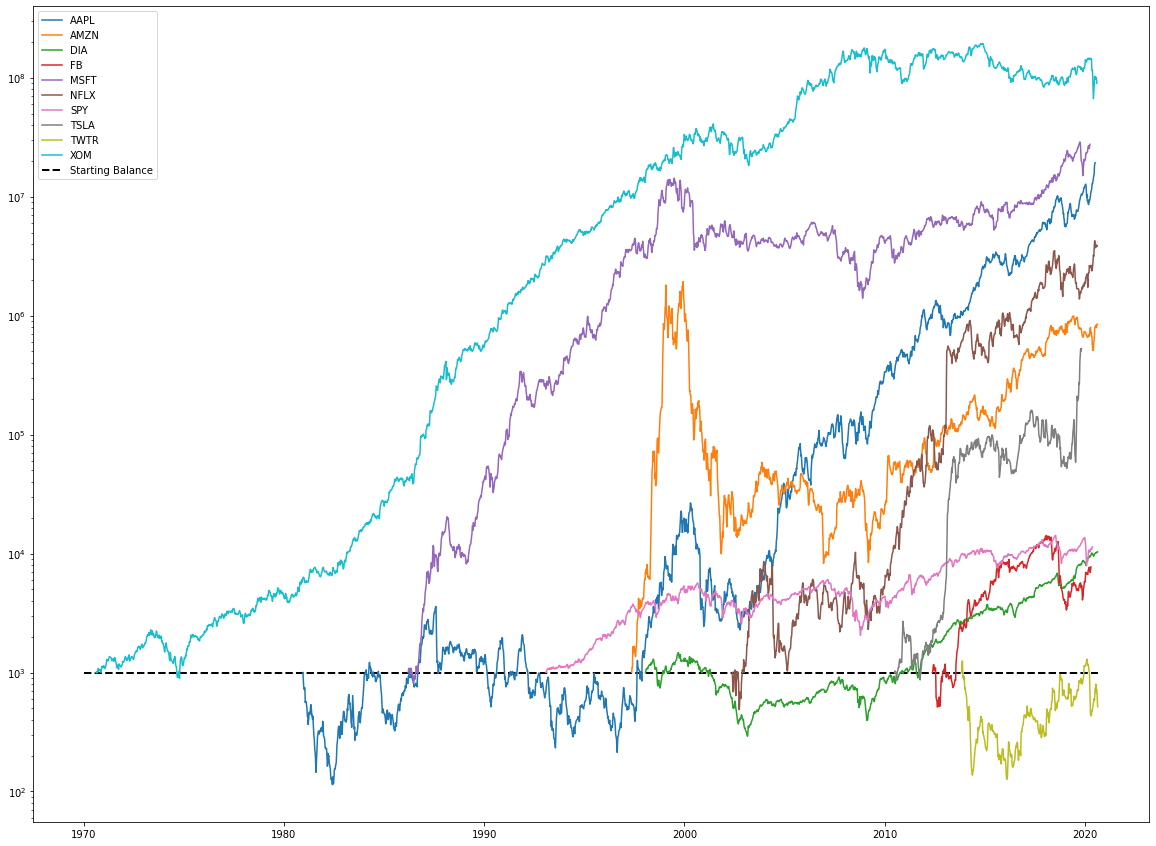

In [19]:
plt.figure(figsize=(20,15))
for s in symbols[0:]:
    hodl_df = pd.read_csv('Results Data/'+s+'_results.csv').iloc[:,[0,2]]
    hodl_df['Date'] = pd.to_datetime(hodl_df.Date)
    plt.plot(hodl_df.Date,hodl_df.iloc[:,1],label=s)

plt.yscale('log')
plt.hlines(y=1000,
           xmin=datetime(1970,1,1), 
           xmax = datetime.today(), 
           colors = 'black', 
           linestyles='dashed', 
           linewidth = 2,
           label='Starting Balance')
plt.legend(loc='best')
plt.show()

In [7]:
hodl_df = pd.DataFrame(columns=['Date'])
base = datetime.today()
hodl_df['Date'] = [base - timedelta(days=x) for x in range(18502)]
hodl_df['Date'] = pd.to_datetime(hodl_df['Date'].dt.date)

for s in symbols:
    sym_df = pd.read_csv('Results Data/'+s+'_results.csv').iloc[:,[0,2]]
    sym_df['Date'] = pd.to_datetime(sym_df.Date)
    hodl_df = hodl_df.merge(sym_df,how='left',on='Date')
    hodl_df.rename(columns={'hodl':s+'_hodl'},inplace=True)

hodl_df.fillna(0,inplace=True)
hodl_df['Total'] = hodl_df.iloc[:,1:].sum(axis=1)
hodl_df[hodl_df.Total!=0]

,Date,AAPL_hodl,AMZN_hodl,DIA_hodl,FB_hodl,MSFT_hodl,NFLX_hodl,SPY_hodl,TSLA_hodl,TWTR_hodl,XOM_hodl,Total
12,2020-08-21,0.0,848065.629912,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,515.076993,0.000000,8.485807e+05
13,2020-08-20,0.0,0.000000,10313.508863,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.031351e+04
16,2020-08-17,0.0,849582.983516,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,571.643720,0.000000,8.501546e+05
19,2020-08-14,0.0,0.000000,10255.997724,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.025600e+04
20,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,3.877358e+06,0.0,0.0,0.000000,0.000000,3.877358e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
18261,1970-09-04,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,995.581070,9.955811e+02
18265,1970-08-31,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1019.093887,1.019094e+03
18271,1970-08-25,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1017.120492,1.017120e+03
18277,1970-08-19,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1013.259450,1.013259e+03


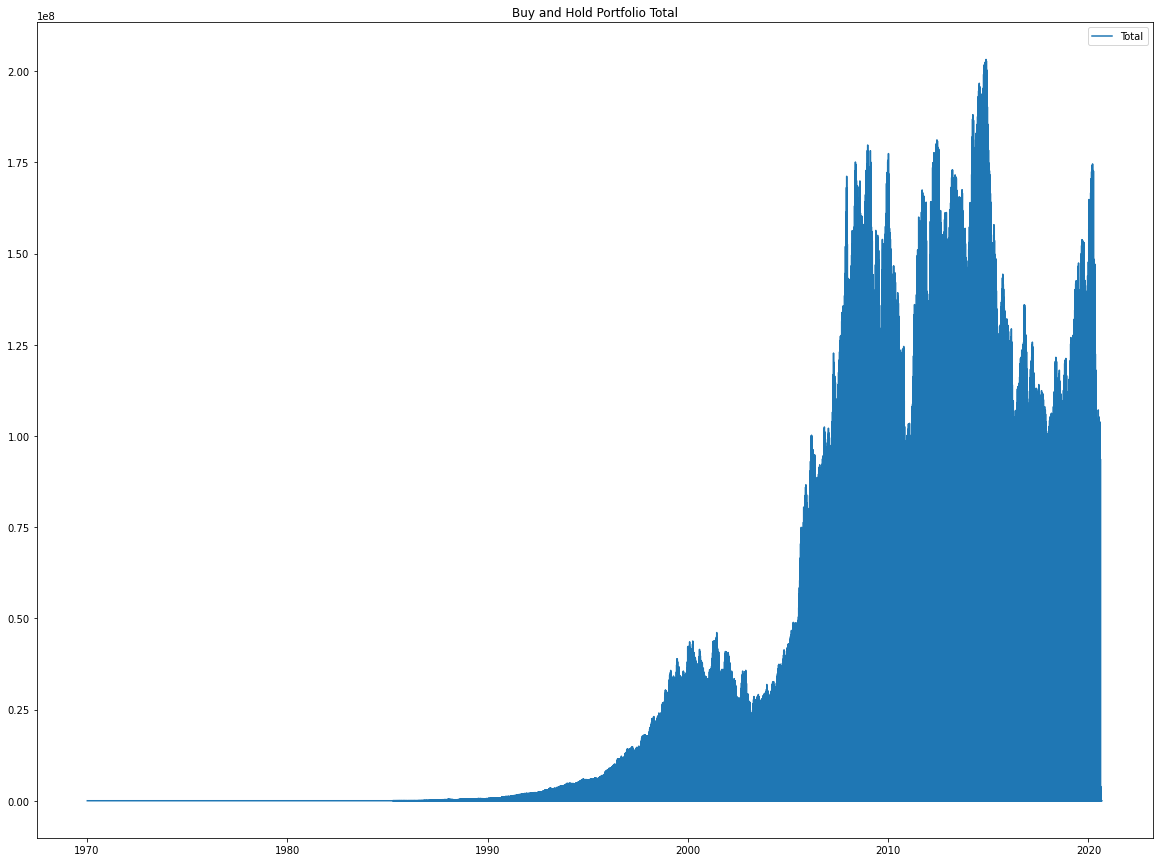

In [8]:
plt.figure(figsize=[20,15])
plt.plot(hodl_df.Date,hodl_df.Total,label='Total')
plt.title('Buy and Hold Portfolio Total')
plt.legend(loc='best')
plt.show()

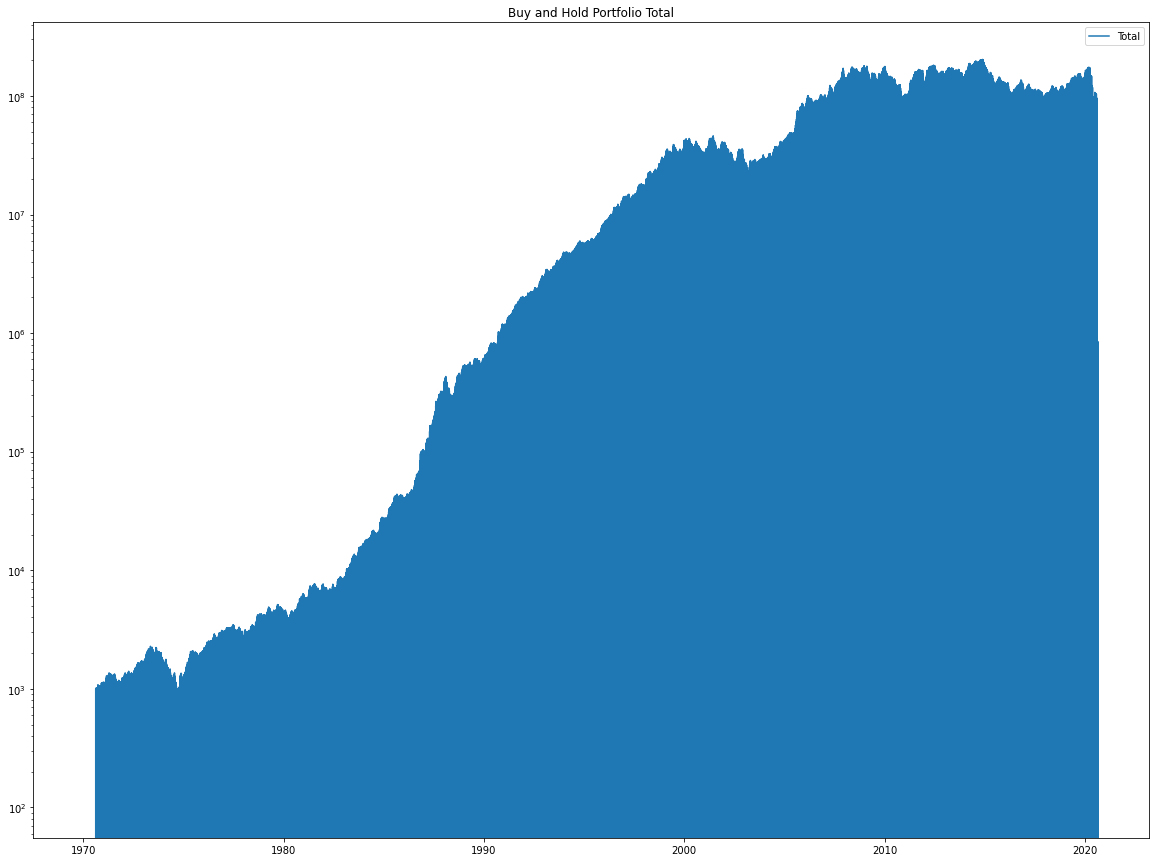

In [9]:
plt.figure(figsize=[20,15])
plt.plot(hodl_df.Date,hodl_df.Total,label='Total')
plt.title('Buy and Hold Portfolio Total')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [10]:
hodl_df[hodl_df.Total!=0]

,Date,AAPL_hodl,AMZN_hodl,DIA_hodl,FB_hodl,MSFT_hodl,NFLX_hodl,SPY_hodl,TSLA_hodl,TWTR_hodl,XOM_hodl,Total
12,2020-08-21,0.0,848065.629912,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,515.076993,0.000000,8.485807e+05
13,2020-08-20,0.0,0.000000,10313.508863,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.031351e+04
16,2020-08-17,0.0,849582.983516,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,571.643720,0.000000,8.501546e+05
19,2020-08-14,0.0,0.000000,10255.997724,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,0.000000,1.025600e+04
20,2020-08-13,0.0,0.000000,0.000000,0.0,0.0,3.877358e+06,0.0,0.0,0.000000,0.000000,3.877358e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
18261,1970-09-04,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,995.581070,9.955811e+02
18265,1970-08-31,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1019.093887,1.019094e+03
18271,1970-08-25,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1017.120492,1.017120e+03
18277,1970-08-19,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.000000,1013.259450,1.013259e+03
